In [1]:
import json
import os

In [2]:
covid_generalist = json.load(open('/Users/sidharrthnagappan/Documents/University/Cambridge/Courses/Explainable AI/labo/notebooks/COVIDX_generalist_allshot_fac_selected_per_class.json'))
covid_specialist = json.load(open('/Users/sidharrthnagappan/Documents/University/Cambridge/Courses/Explainable AI/labo/notebooks/COVIDX_specialist_allshot_fac_selected_per_class.json'))

ham10000_generalist = json.load(open('/Users/sidharrthnagappan/Documents/University/Cambridge/Courses/Explainable AI/labo/notebooks/HAM10000_generalist_allshot_fac_selected_per_class.json'))
ham10000_specialist = json.load(open('/Users/sidharrthnagappan/Documents/University/Cambridge/Courses/Explainable AI/labo/notebooks/HAM10000_specialist_allshot_fac_selected_per_class.json'))

In [3]:
covid_generalist

{'COVID': {'concepts': ['Halo Sign',
   'Cavitation presence',
   'Crazy paving patterns',
   'Multifocal patchy opacities',
   'Density variations',
   'Parenchymal band',
   'Reverse Halo Sign',
   'Pulmonary nodule or mass',
   'Reverse halo sign',
   'Lung Periphery Changes',
   'Focal unilateral ground-glass opacity',
   'Inverted halo sign',
   'Increased interstitial markings',
   'Presence of crazy paving pattern',
   'Vascular enlargement in affected areas',
   'Increased lung opacity',
   'Pleuroparenchymal band',
   'Crazy Paving Pattern',
   'Upper lobe involvement',
   'Radiological appearance progression over time',
   'Interstitial markings',
   'Atoll sign',
   'Crazy paving appearance',
   'Hazy regions',
   'Increased lung density',
   'Lung segment atelectasis',
   'Airspace opacity',
   'Hazy lung regions',
   'Traction Bronchiectasis',
   'Patchy Infiltrates',
   'Asymmetry in lung opacification',
   'Lung lesion density',
   'Ground glass opacities',
   'Cystic ch

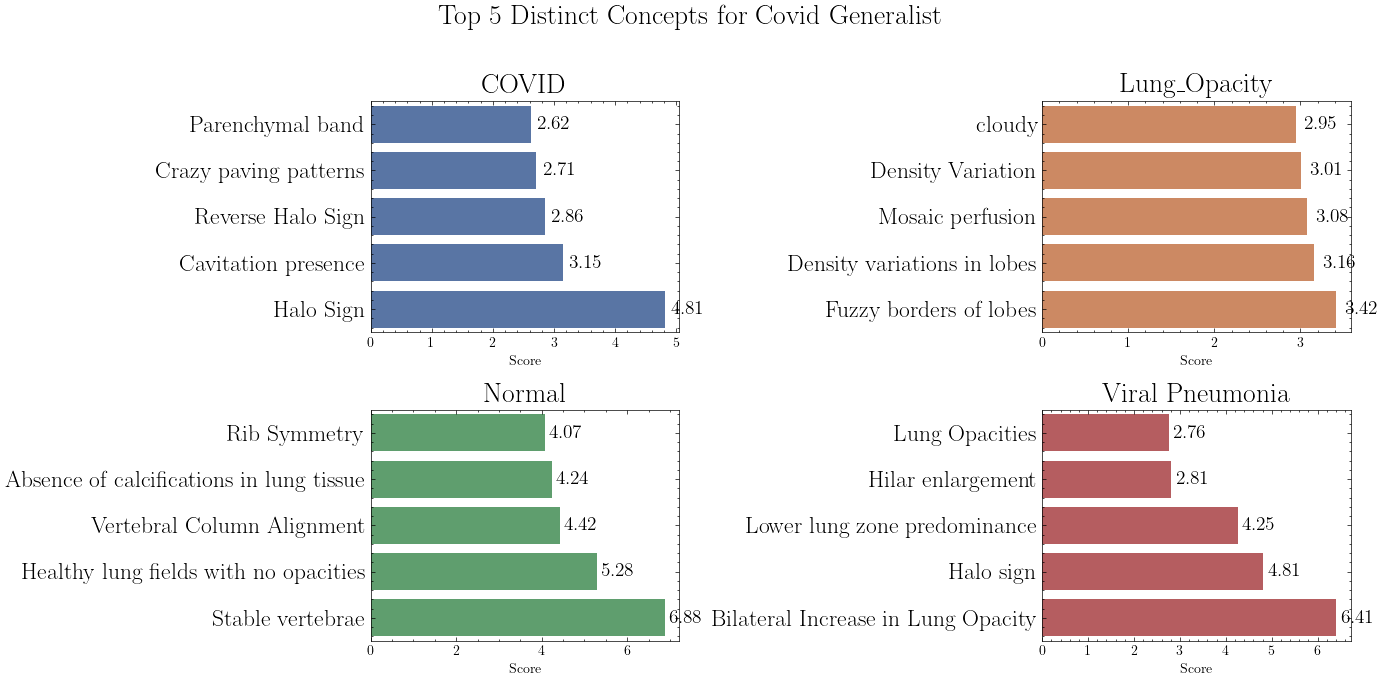

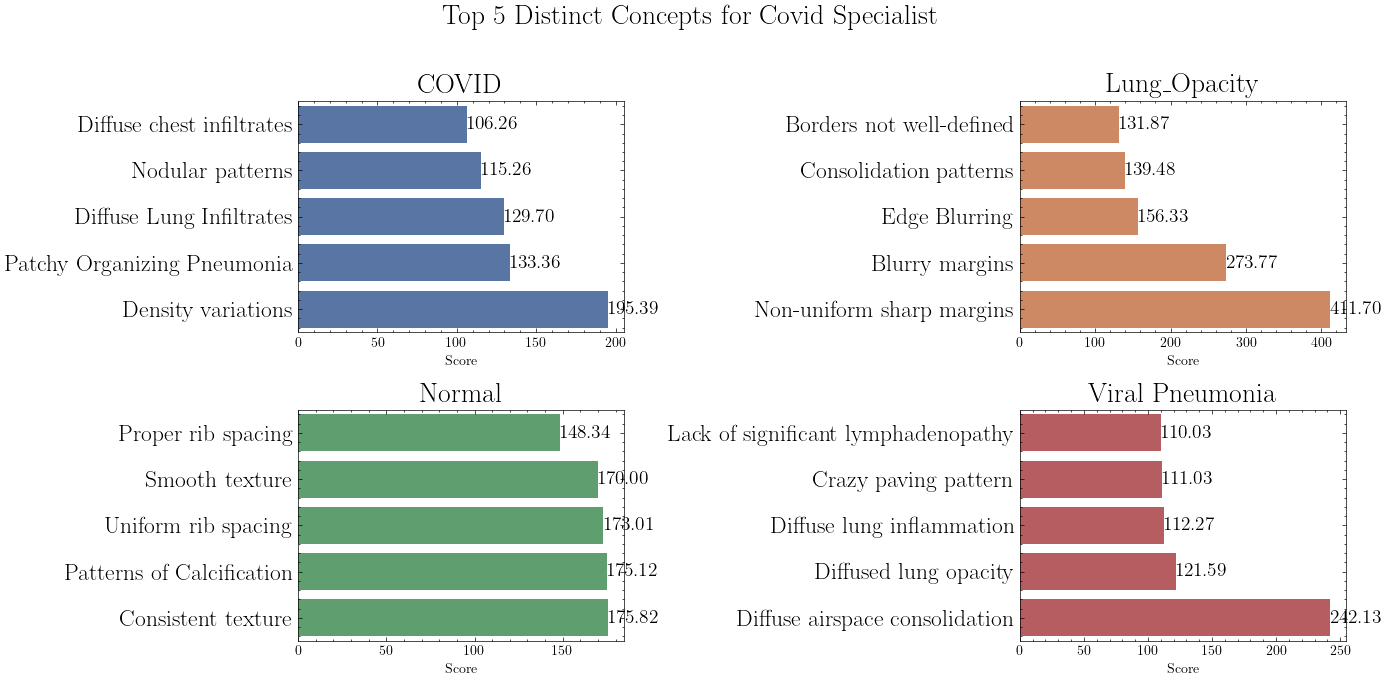

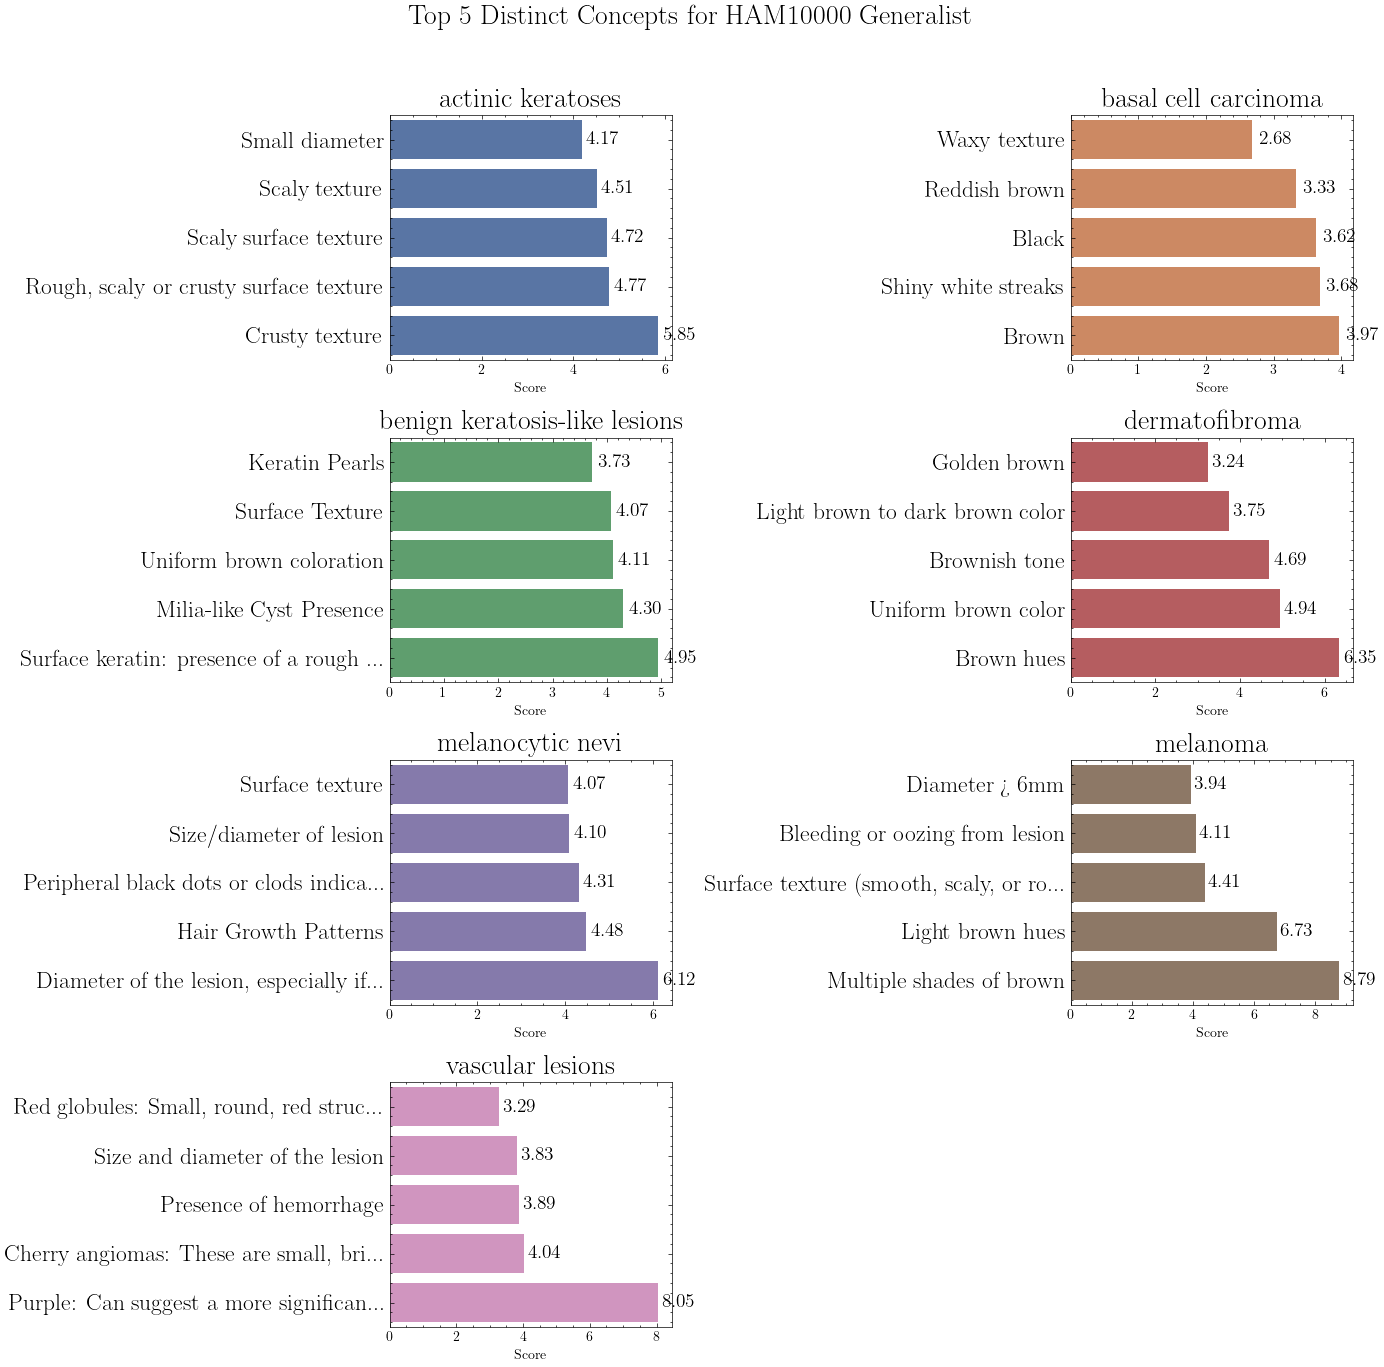

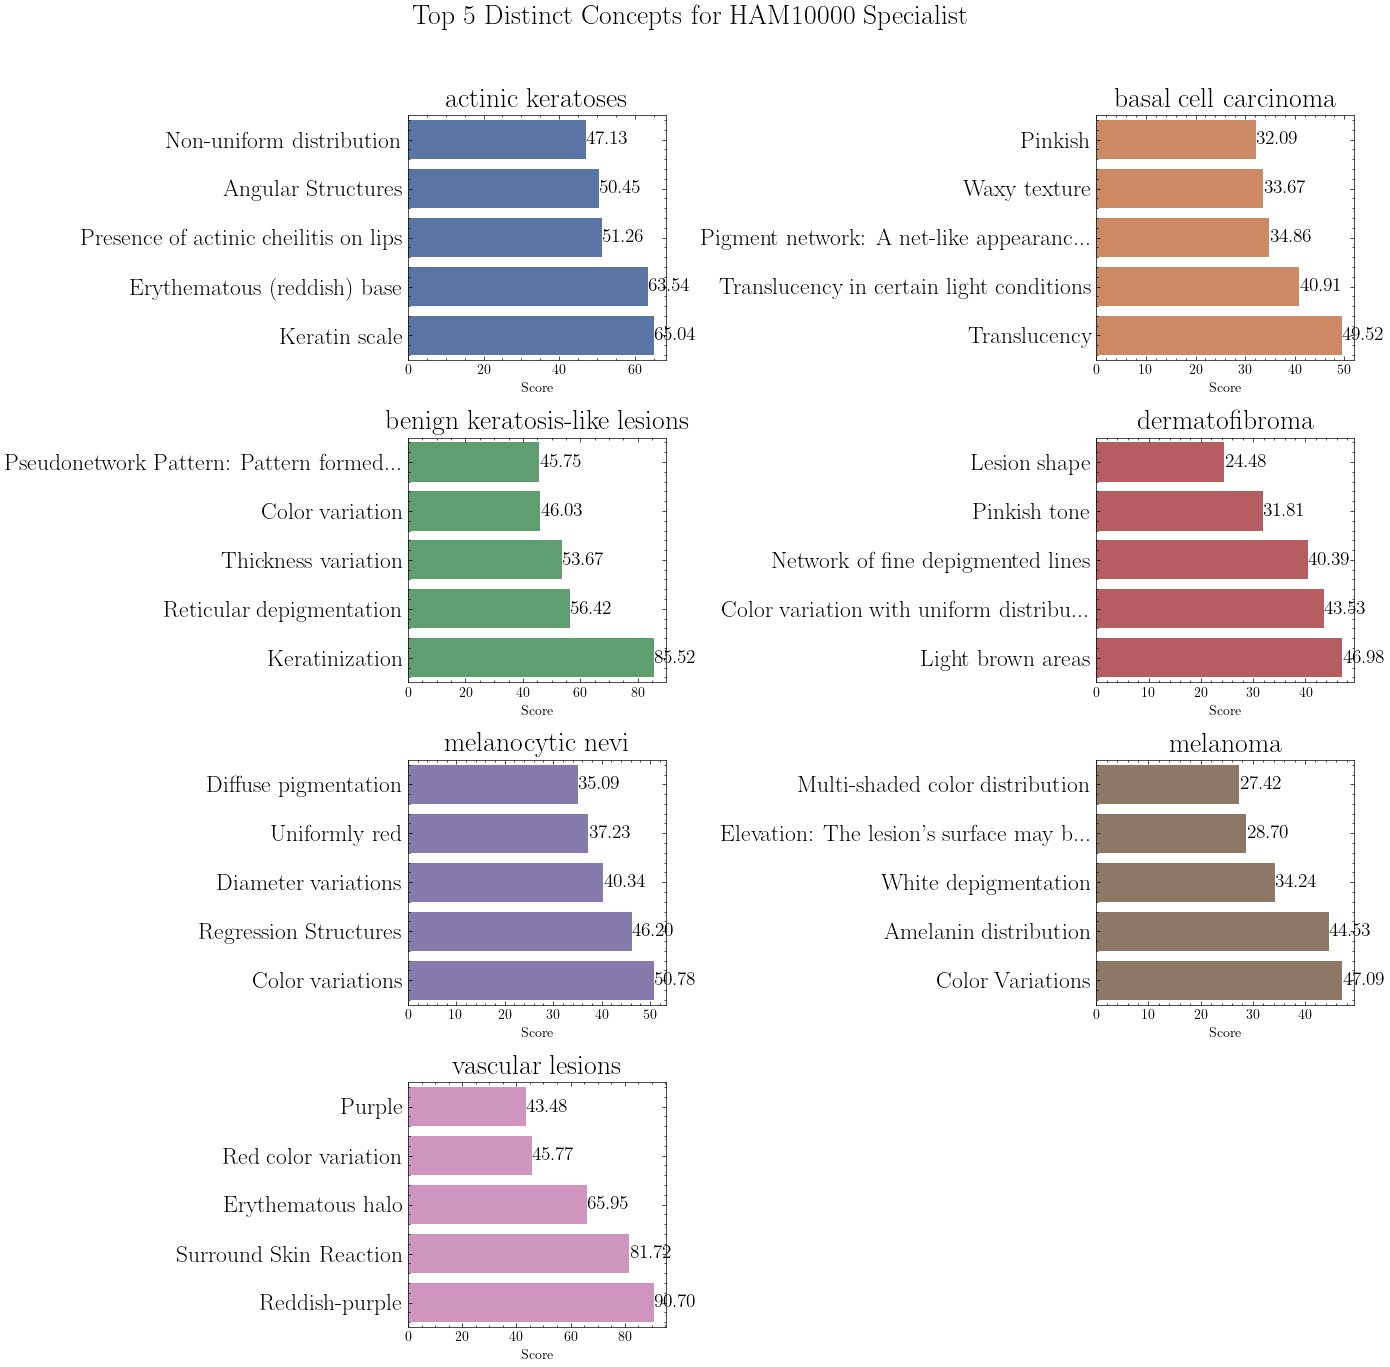

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scienceplots
from fuzzywuzzy import fuzz
import string
import math

plt.style.use('science')

# Dummy mapping — replace with your actual loaded data
mapping = {
    "Covid Generalist": covid_generalist,
    "Covid Specialist": covid_specialist,
    "HAM10000 Generalist": ham10000_generalist,
    "HAM10000 Specialist": ham10000_specialist
}

# Truncate helper
def truncate(text, max_length=40):
    return text if len(text) <= max_length else text[:max_length - 3] + "..."

for d in mapping.keys():
    data = mapping[d]

    # Function to normalize concept strings
    def normalize(text):
        return text.lower().translate(str.maketrans('', '', string.punctuation)).strip()

    # Extract and deduplicate top concepts per class
    records = []
    for cls, cls_data in data.items():
        concepts = cls_data["concepts"]
        scores = cls_data["scores"]
        
        paired = list(zip(concepts, scores))
        paired.sort(key=lambda x: x[1], reverse=True)

        selected = []
        seen_norms = []

        for concept, score in paired:
            norm = normalize(concept)
            if all(fuzz.ratio(norm, s) < 85 for s in seen_norms):
                selected.append((concept, score))
                seen_norms.append(norm)
            if len(selected) == 5:
                break

        for concept, score in selected:
            records.append({
                "Class": cls,
                "Concept": truncate(concept),
                "Score": score
            })

    df = pd.DataFrame(records)

    classes = df['Class'].unique()
    palette = sns.color_palette("deep", n_colors=len(classes))
    class_colors = dict(zip(classes, palette))

    n_cols = 2
    n_rows = math.ceil(len(classes) / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3.5 * n_rows), sharex=False)
    axes = axes.flatten()  # flatten in case nrows * ncols > 1

    for ax, cls in zip(axes, classes):
        subset = df[df['Class'] == cls].sort_values("Score", ascending=True)
        sns.barplot(
            data=subset,
            x="Score",
            y="Concept",
            ax=ax,
            color=class_colors[cls]
        )
        ax.set_title(cls, fontsize=20)
        ax.set_xlabel("Score")
        ax.set_ylabel("")
        ax.tick_params(axis='y', labelsize=17)  # ← This line increases concept label size

        for i, (score, concept) in enumerate(zip(subset["Score"], subset["Concept"])):
            ax.text(score + 0.1, i, f"{score:.2f}", va='center', fontsize=14)

    # Hide unused subplots if any
    for i in range(len(classes), len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle(f"Top 5 Distinct Concepts for {d}", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f"/Users/sidharrthnagappan/Documents/University/Cambridge/Courses/Explainable AI/labo/report/images/{d}.png")
    plt.show()

In [17]:
!pip install fuzzywuzzy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
